**Problem**
There are many seasons that sales are significantly higher or lower than averages. If the company does not know about these seasons, it can lose too much money. Predicting future sales is one of the most crucial plans for a company. Sales forecasting gives an idea to the company for arranging stocks, calculating revenue, and deciding to make a new investment. Another advantage of knowing future sales is that achieving predetermined targets from the beginning of the seasons can have a positive effect on stock prices and investors' perceptions. Also, not reaching the projected target could significantly damage stock prices, conversely. And, it will be a big problem especially for Walmart as a big company.

**Aim**

My aim in this project is to build a model which predicts sales of the stores. With this model, Walmart authorities can decide their future plans which is very important for arranging stocks, calculating revenue and deciding to make new investment or not.


With the accurate prediction company can;

    .Determine seasonal demands and take action for this.

    .Protect from money loss because achieving sales targets can have a positive effect on stock prices and investors' perceptions

    .Forecast revenue easily and accurately

    .Manage inventories

    .Do more effective campaigns




In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error,mean_squared_error
import math

import warnings #surpress warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('WALMART_SALES_DATA.csv')

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.shape

(6435, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

There's no null values in our dataset

since we are working with time series, the most essential features are time related feature.

In [7]:
import datetime

df['Date']=pd.to_datetime(df['Date'])
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [8]:
#Display summary statistics

df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


## Plot histograms of the numerical columns

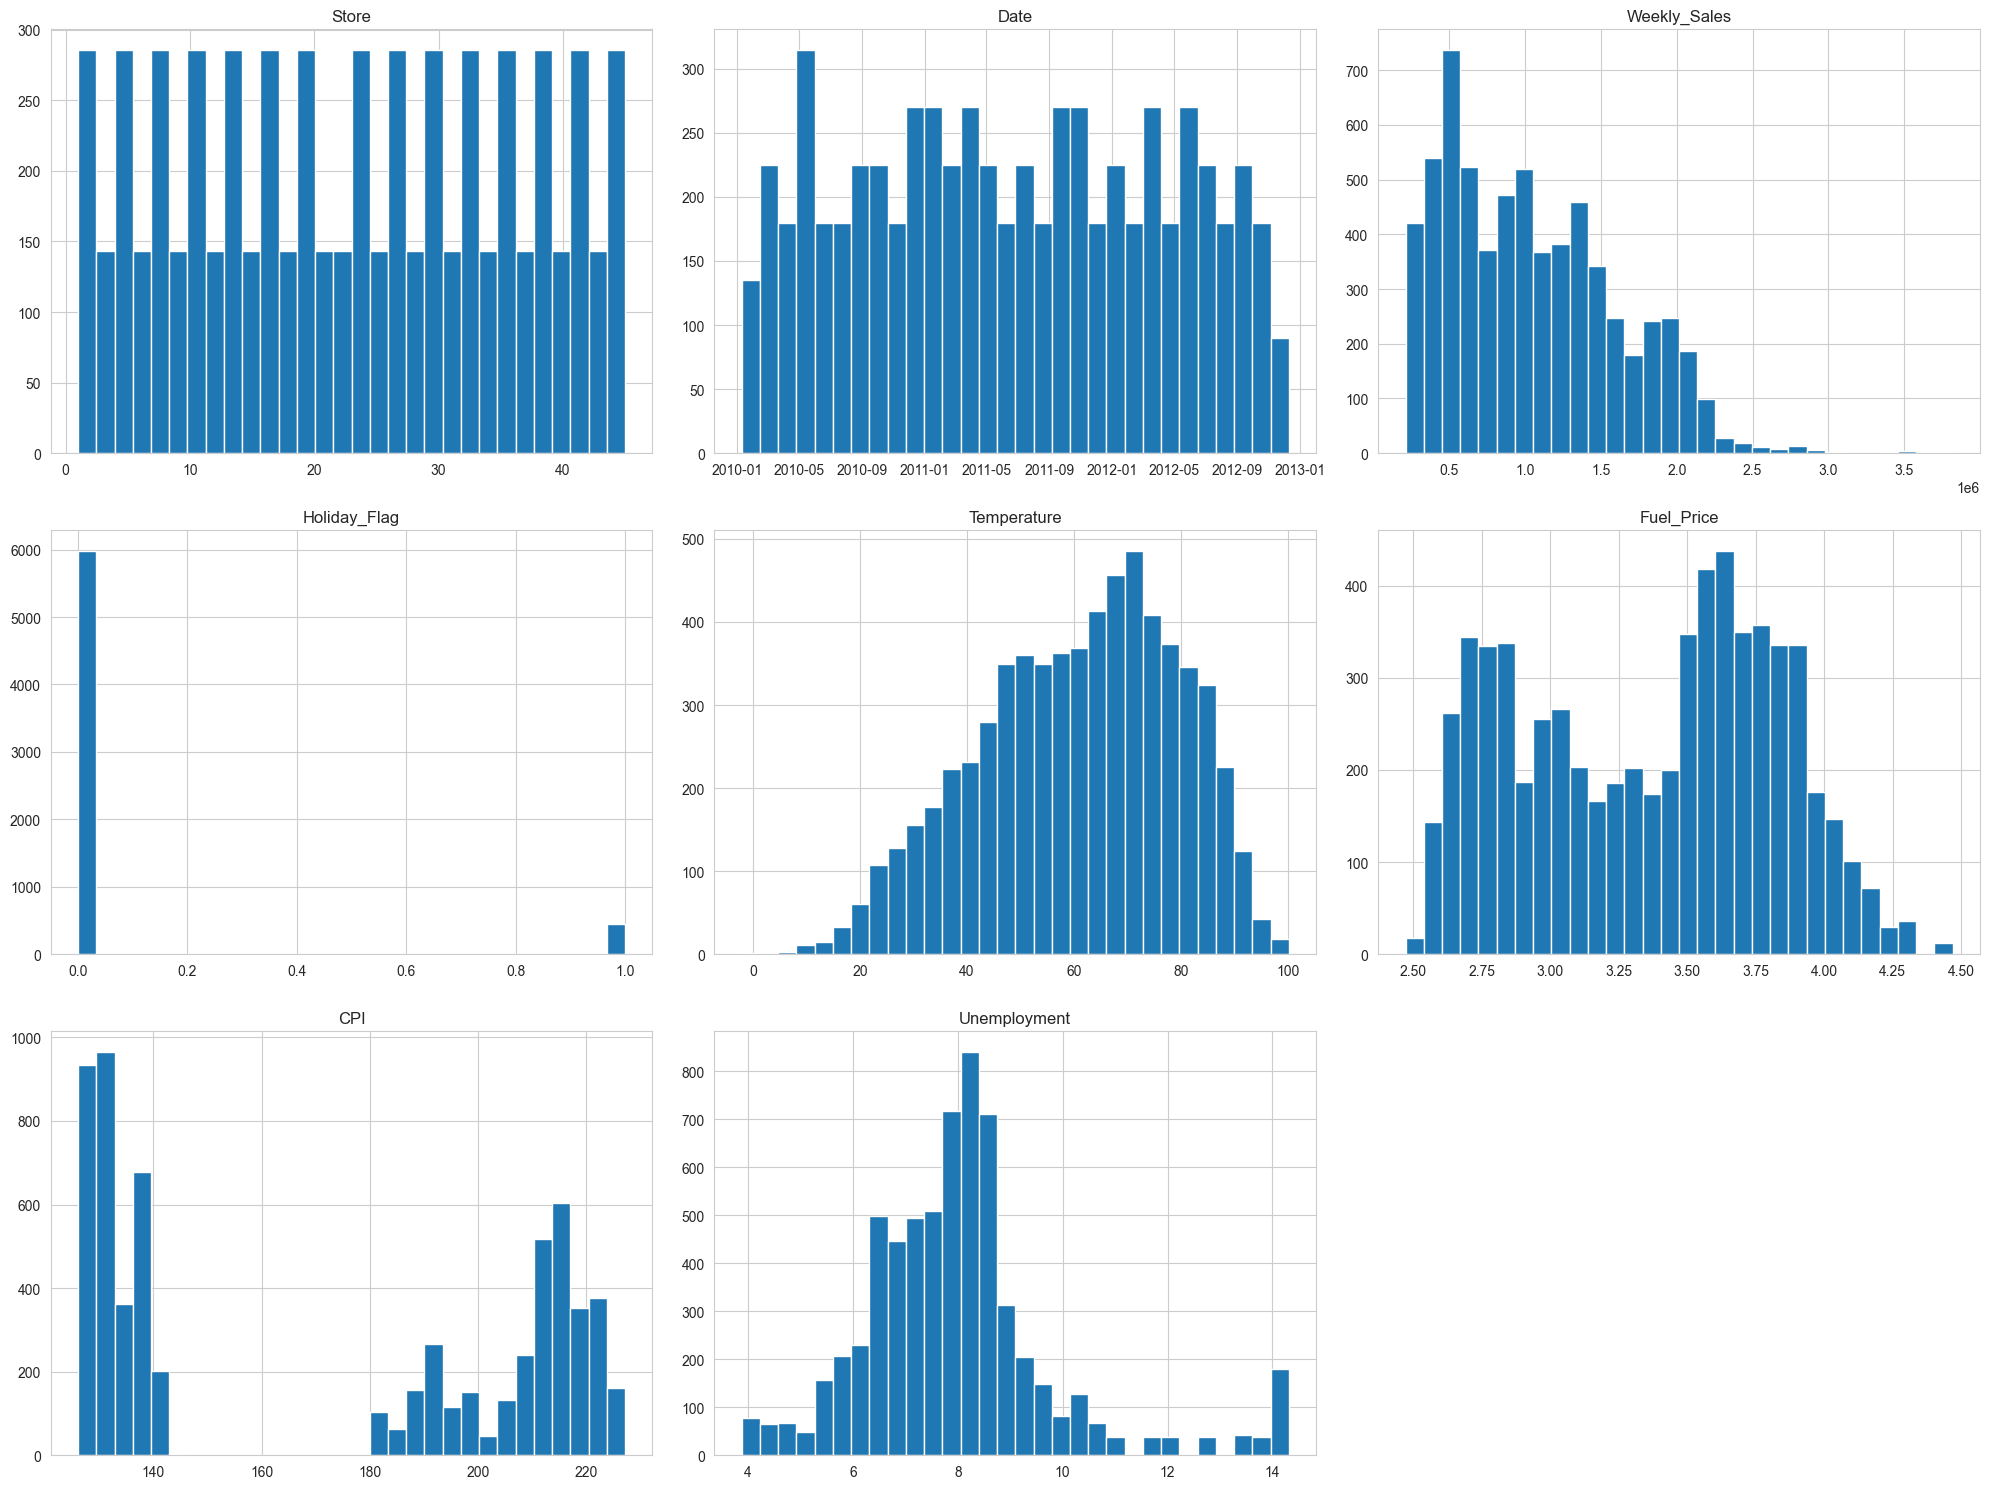

In [9]:
#set style of the seaborn plot
sns.set_style('whitegrid')

#histograms
df.hist(bins=30,figsize=(20,15))
plt.tight_layout()
plt.show()

**IsHoliday**: This is a binary variable indicating whether a week is a holiday week or not. It is expected to have fewer holiday weeks than non-holiday weeks, as holidays are relatively less frequent.

**CPI, Temperature, and Unemployment**: These columns appear to have a more or less normal distribution. The distribution of Temperature is slightly left-skewed, indicating that lower temperatures may be more common. CPI (Consumer Price Index) and Unemployment seem to have a relatively symmetric distribution.

**Fuel_Price**: The distribution of Fuel_Price is slightly right-skewed. This suggests that higher fuel prices are less common, and lower prices are more frequently observed.

**Weekly_Sales**: The distribution of Weekly_Sales is heavily right-skewed. This indicates that higher sales amounts are less common, while lower sales amounts occur more frequently

## Calculate the correlation matrix

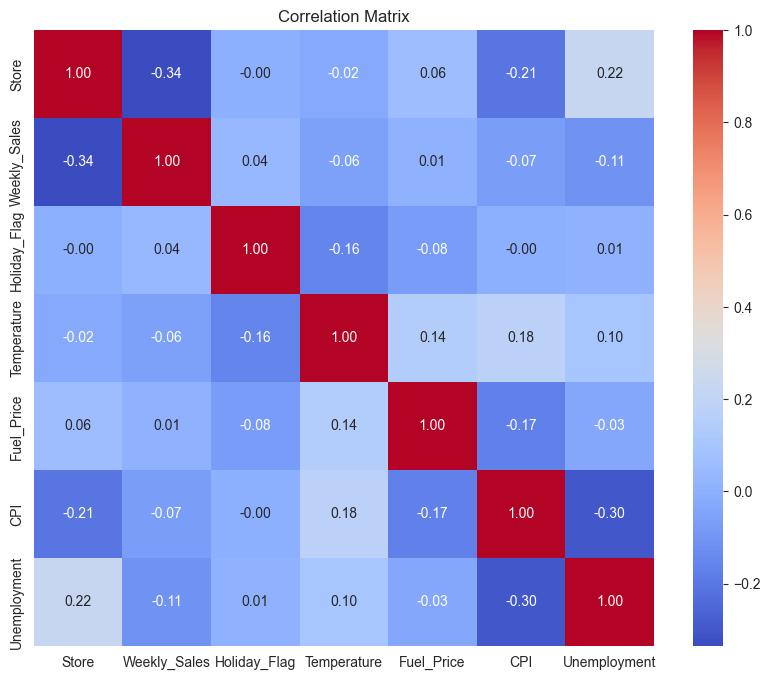

In [10]:
corr_matrix=df.corr()

#plot the heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**.Weekly_sales and Store**:There is strong negative correlation ,indicating that certain stores tend to have lower sales.This implies that the store type can have an impact on sales.

**.CPI and Unemployment**: CPI and Unemployment exhibit a negative correlation. This is expected, as higher unemployment rates often result in lower consumer price index values. This correlation suggests an inverse relationship between consumer prices and unemployment rates.

**.Temperature and other variables**: Temperature does not seem to have a strong correlation with the other variables mentioned. This suggests that temperature may not play a significant role in influencing sales or the other factors mentioned.

.Other features show litle to no correlation with thw weekly sales.This suggests that these may not have a significant impact on overall sales.

## Lets plot weekly sales over time

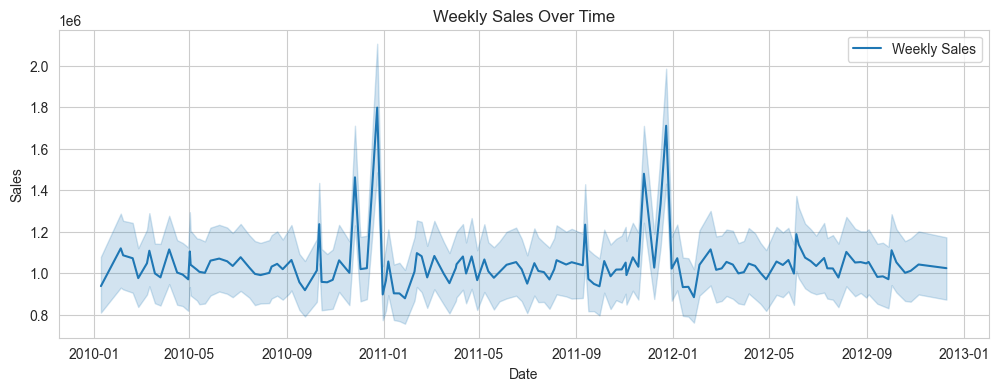

In [11]:
plt.figure(figsize=(12,4))
sns.lineplot(x=df['Date'],y=df['Weekly_Sales'],label='Weekly Sales')

plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

The plot above shows the Weekly_Sales over time. There is a clear pattern of sales peaking around certain times of the year, likely corresponding to popular shopping seasons such as the year-end holidays.

## PLot the distribution of weekly sales during holiday weeks and non-holiday weeks


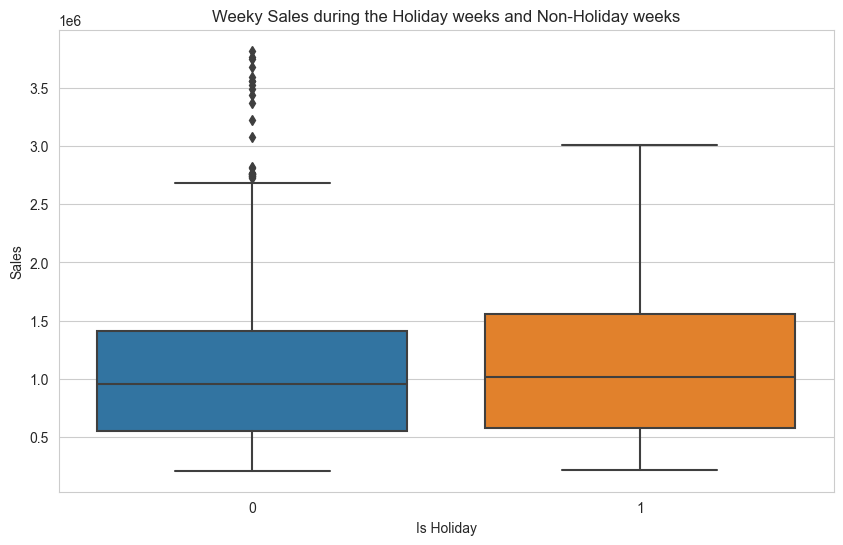

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Holiday_Flag',y='Weekly_Sales',data=df)
plt.title('Weeky Sales during the Holiday weeks and Non-Holiday weeks')
plt.xlabel('Is Holiday')
plt.ylabel('Sales')
plt.show()

The boxplot above shows the distribution of Weekly_Sales during holiday weeks and non-holiday weeks. We can observe that the median sales during holiday weeks are slightly higher than non-holiday weeks, which is expected as holidays usually correspond to increased consumer spending. However, the range of sales is quite wide in both cases, indicating a large variability in weekly sales.

## Outlier detection

In [13]:
from scipy.stats import zscore

#calculate the z-scores of the weekly_sales column
df['Sales_Zscore']=zscore(df['Weekly_Sales'])

#DEfine a threshold for the outliers
threshold=3

#Identify outliers
outliers=df[abs(df['Sales_Zscore'])>threshold]

#Number of outliers
num_outliers=len(outliers)

num_outliers

31

We identified 31 outliers in the weekly sales data,based o the Zscore method with threshhold of 3.This is a small number;Keep in mind our data sales is heavily skewed.

Let's proceed with time series forecasting. For this, we need to create a time series dataset that aggregates Weekly_Sales at the overall level (i.e., summing sales of all stores and departments for each week).

## Stationarity

Some time series models,such as ARIMA,assume that the underlying data is staionary.Stationaty describes that the time-series has:

.constant mean and mean is not time-dependent<br>
.contsant variance and variance is not time-dependent<br>
.contsant covariance and covariance is not time-dependent<br>

The check for staionarity can be done via diff approaches:

1.Visually:plot time series and check for trends<br>
2.basic statistic:Split time series and compare mean and variance of each partition<br>
3.statistical test:Augmented Dickey Fuller test

I'm using ADF

In [14]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['Weekly_Sales'].values)
result

(-4.624149498578304,
 0.00011655869699901207,
 34,
 6400,
 {'1%': -3.4313721757424656,
  '5%': -2.8619917128968813,
  '10%': -2.5670104435791017},
 171522.33418043077)

.The P-value is less than 0.05

.Check the range of the ADF ststistic compared with critical_values

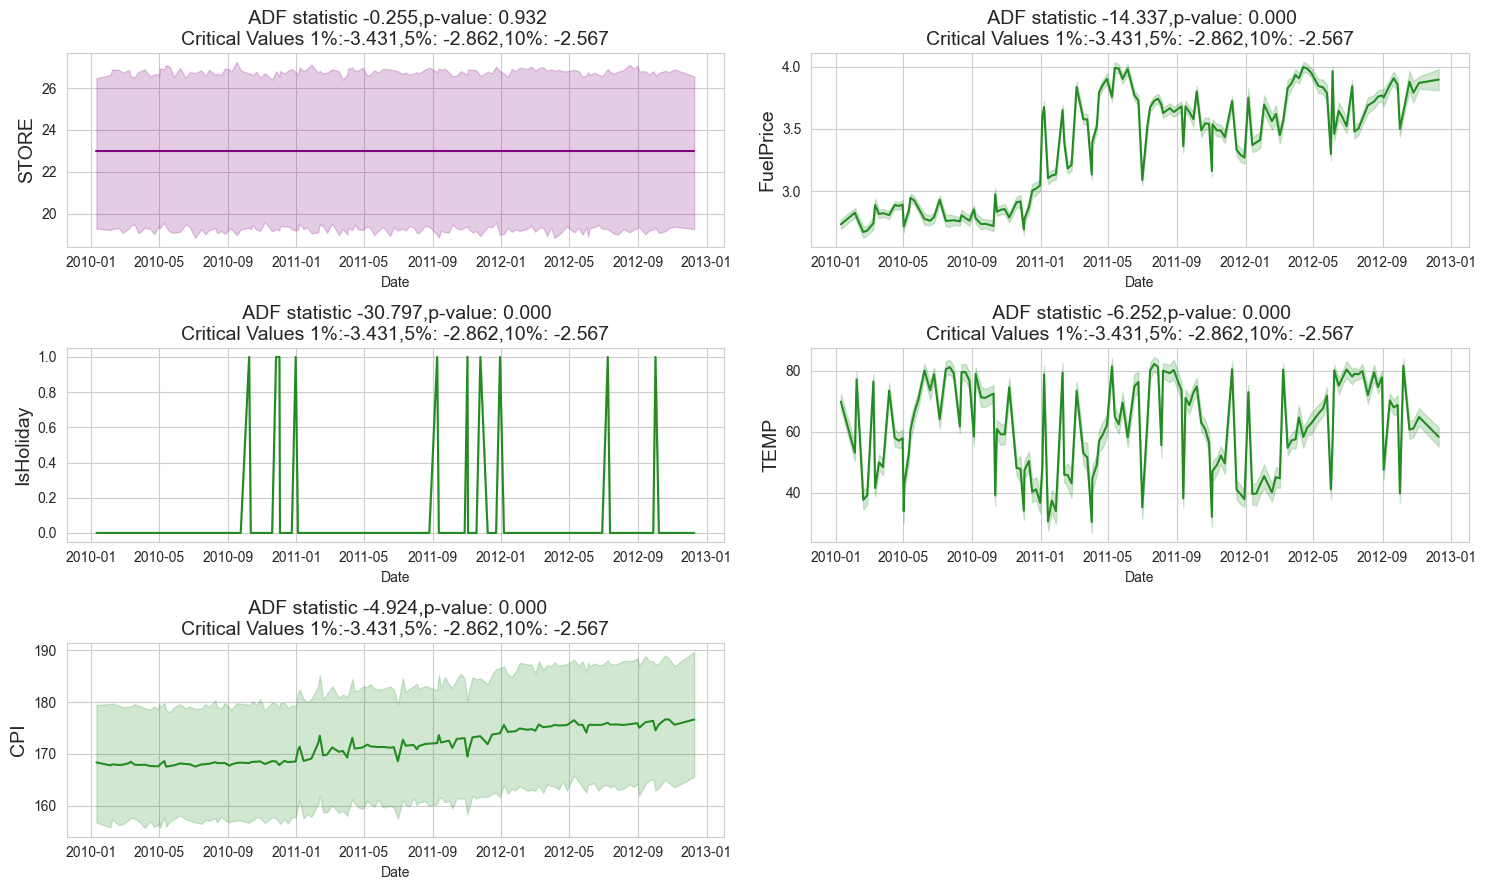

In [15]:
f,ax=plt.subplots(nrows=3,ncols=2,figsize=(15,9))

def visualize_adfuller_results(series,title,ax):
    result=adfuller(series)
    significance_level=0.05
    adf_stat=result[0]
    p_value=result[1]
    crit_val_1=result[4]['1%']
    crit_val_5=result[4]['5%']
    crit_val_10=result[4]['10%']

    if (p_value<significance_level) & ((adf_stat < crit_val_1)):
        linecolor='forestgreen'
    elif (p_value< significance_level) & (adf_stat< crit_val_5):
        linecolor='orange'
    elif (p_value< significance_level) & (adf_stat< crit_val_10):
        linecolor='red'
    else:
        linecolor='purple'
    sns.lineplot(x=df['Date'],y=series,ax=ax,color=linecolor)
    ax.set_title(f" ADF statistic {adf_stat:0.3f},p-value: {p_value:0.3f}\nCritical Values 1%:{crit_val_1:0.3f},5%: {crit_val_5:0.3f},10%: {crit_val_10:0.3f}",fontsize=14)
    ax.set_ylabel(ylabel=title,fontsize=14)
visualize_adfuller_results(df['Store'].values,'STORE',ax[0,0])
visualize_adfuller_results(df['Holiday_Flag'].values,'IsHoliday',ax[1,0])
visualize_adfuller_results(df['Fuel_Price'].values,'FuelPrice',ax[0,1])
visualize_adfuller_results(df['Temperature'].values,'TEMP',ax[1,1])
visualize_adfuller_results(df['CPI'].values,'CPI',ax[2,0])
visualize_adfuller_results(df['Unemployment'].values,'Unemp',ax[2,1])
f.delaxes(ax[2,1])
plt.tight_layout()

plt.show()




**ADF** statistic is less than the critical value;Thus reject null hypothesis (H0);
This means our data is stationary;

But if our data is not staionary we transform it staionary by;<br>
   .Transformation<br>
   .Differencing<br>

## Decomposition

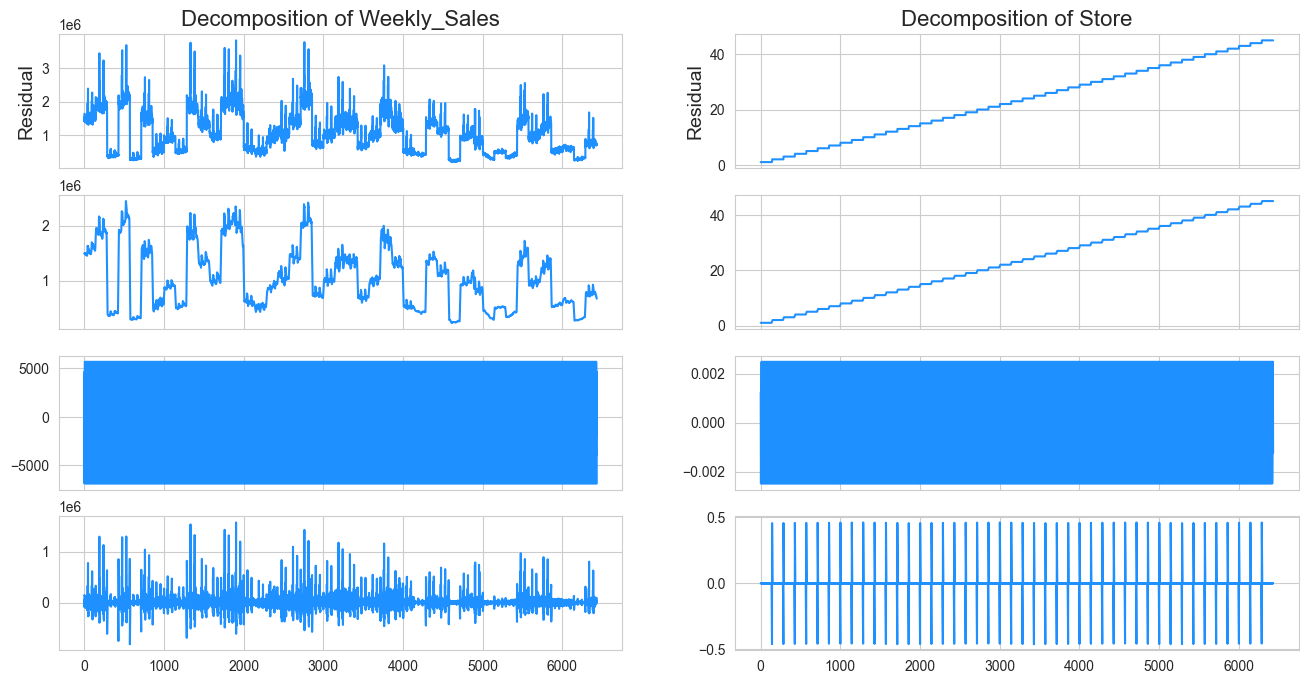

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
core_columns=['Store','Temperature','Weekly_Sales','CPI',
                  'Unemployment','Holiday_Flag']

for column in core_columns:
    decomp=seasonal_decompose(df[column],period=12,model='additive',extrapolate_trend='freq')
    df[f'{column}_trend']=decomp.trend
    df[f'{column}_seasonal']=decomp.seasonal

fig, ax=plt.subplots(ncols=2,nrows=4,sharex=True,figsize=(16,8))
for i, column in enumerate(['Weekly_Sales','Store']):
    res=seasonal_decompose(df[column],period=12,model='additive',extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column),fontsize=16)
    
    res.observed.plot(ax=ax[0,i],legend=False,color='dodgerblue')
    ax[0,i].set_ylabel('Observed',fontsize=14)

    res.trend.plot(ax=ax[1,i],legend=False,color='dodgerblue')
    ax[0,i].set_ylabel('Trend',fontsize=14)

    res.seasonal.plot(ax=ax[2,i],legend=False,color='dodgerblue')
    ax[0,i].set_ylabel('Seasonal',fontsize=14)

    res.resid.plot(ax=ax[3,i],legend=False,color='dodgerblue')
    ax[0,i].set_ylabel('Residual',fontsize=14)
plt.show()

**Autocorrelation Analysis** <br>
Helps in detecting seasonality

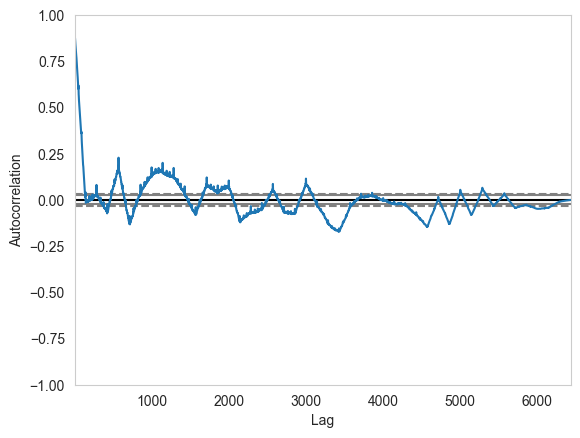

In [17]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Weekly_Sales'])
plt.show()

ACF and ADF

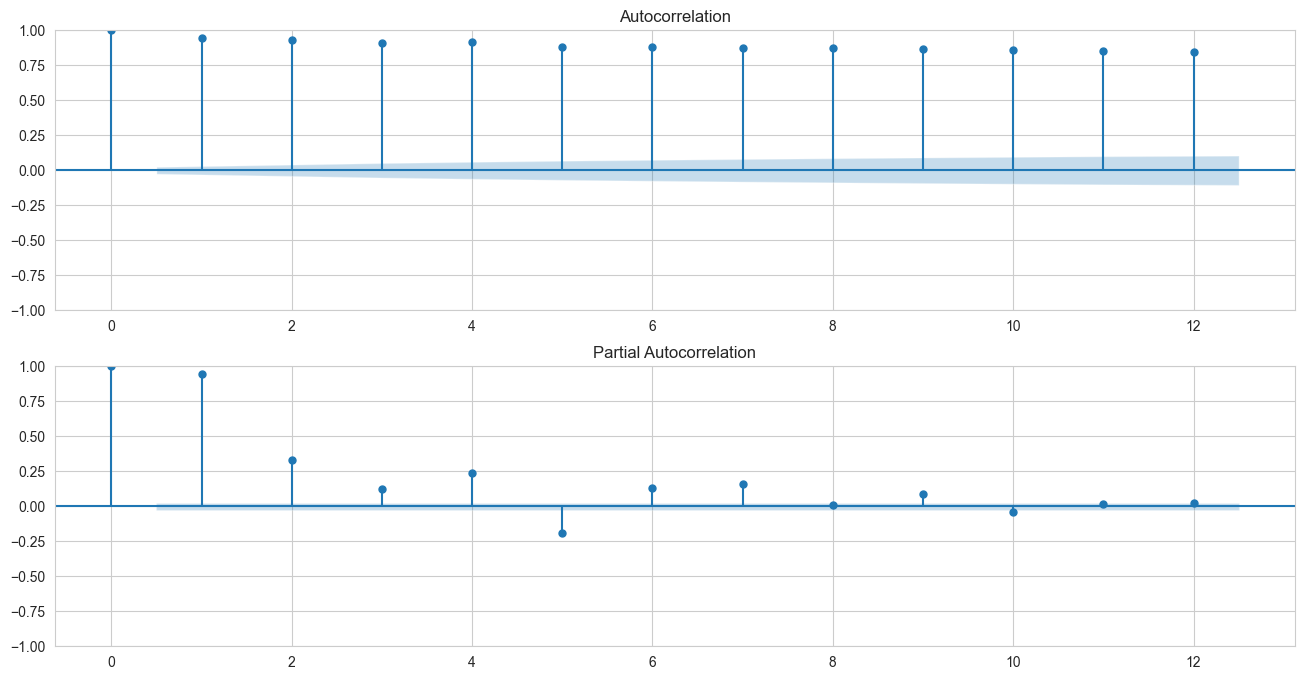

In [18]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f,ax =plt.subplots(nrows=2,ncols=1,figsize=(16,8))

plot_acf(df['Weekly_Sales'],lags=12,ax=ax[0])
plot_pacf(df['Weekly_Sales'],lags=12,ax=ax[1])

plt.show()

A gradual geometrically declining ACF and a PACF that is significant for only a few lags indicate an AR process.In the figures we can see that ACF is geometrically declining with lags.<br>
The PACF has 2 significant lags followed by a drop in PACF values and they become insignificant.W ith 2 significant PACF lags and gradually falling ACF , we can say the series is an AR(2) process.

**AR Model**

In [23]:
from statsmodels.tsa.ar_model import AutoReg
#Splitting the time series data
train=df['Weekly_Sales'].iloc[:-500]
test=df['Weekly_Sales'].iloc[-500]

#Fit the model
AR_model=AutoReg(train,lags=12).fit()

In [24]:
print(AR_model.summary())

                            AutoReg Model Results                             
Dep. Variable:           Weekly_Sales   No. Observations:                 5935
Model:                    AutoReg(12)   Log Likelihood              -79568.435
Method:               Conditional MLE   S.D. of innovations         165192.682
Date:                Mon, 07 Aug 2023   AIC                         159164.870
Time:                        15:24:31   BIC                         159258.483
Sample:                            12   HQIC                        159197.400
                                 5935                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.154e+04   4836.020      4.454      0.000    1.21e+04     3.1e+04
Weekly_Sales.L1      0.6114      0.013     47.072      0.000       0.586       0.637
Weekly_Sales.L2      0.1721 

**Make Predictions**

In [25]:
prediction=AR_model.predict(start=len(train),end=len(df)-1,dynamic=False)

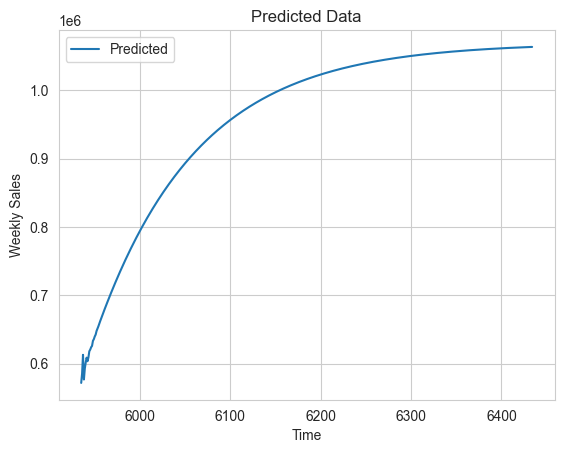

In [26]:
#Plot predicted data

plt.plot(prediction,label='Predicted')

#Add labels
plt.xlabel('Time')
plt.ylabel('Weekly Sales')
plt.title('Predicted Data')
plt.legend()

plt.show()